In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
# https://drawdata.xyz/ 사이트에서 Scatter 데이터를 만들고 copy csv 클릭 후 아래 코드 실행
df = pd.read_clipboard(sep=',') # 클립보드(Ctrl+c)에 복사된 데이터를 가져옴
df.head()

,x,y,z
0,59.000184,79.862289,a
1,88.678487,102.374585,a
2,122.465276,64.384521,a
3,72.471959,81.124508,a
4,120.174152,61.587003,a


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       257 non-null    float64
 1   y       257 non-null    float64
 2   z       257 non-null    object 
dtypes: float64(2), object(1)
memory usage: 6.2+ KB


In [55]:
# StandardScaler로 데이터 변환하기
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(df[['x','y']]) # 숫자형 데이터만
scaled_numeric_data.shape

(257, 2)

In [61]:
# 스케일된 데이터로 새로운 DataFrame 만들기
scaled_df = pd.DataFrame(
    scaled_numeric_data,
    columns=['x','y'],
    index=df.index
)
scaled_df.head()

,x,y
0,-1.901390,-1.657493
1,-1.748694,-1.465842
2,-1.574859,-1.789259
3,-1.832077,-1.646748
4,-1.586647,-1.813074


In [67]:
# scaled_df와 원본데이터의 타겟(z)를 합치기
scaled_df = pd.concat([ scaled_df, df[['z']]], axis=1)
scaled_df.head()

,x,y,z
0,-1.901390,-1.657493,a
1,-1.748694,-1.465842,a
2,-1.574859,-1.789259,a
3,-1.832077,-1.646748,a
4,-1.586647,-1.813074,a


In [73]:
# 클래스별로 데이터 프레임 나누기
df_a = scaled_df[ scaled_df['z'] == 'a' ]
df_b = scaled_df[ scaled_df['z'] == 'b' ]
print(df_a.shape, df_b.shape)

(121, 3) (136, 3)


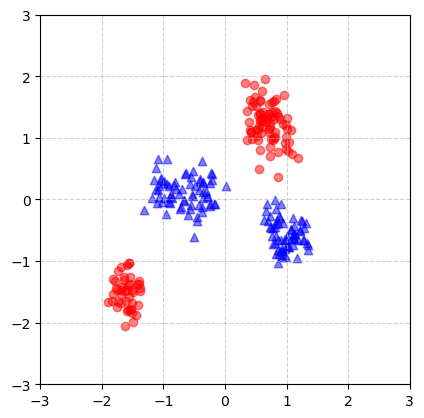

In [85]:
# 데이터 시각화
plt.axes().set_aspect('equal')
plt.xlim((-2.5,2.5)) # 적당히 설정, 안해도됨
plt.ylim((-2.5,2.5))

plt.scatter(df_a['x'], df_a['y'], color='red', marker='o', alpha=0.5)
plt.scatter(df_b['x'], df_b['y'], color='blue', marker='^', alpha=0.5)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [307]:
# Features와 Target 나누기
X = scaled_df.drop('z', axis=1)
y = np.array(scaled_df['z'] == 'a').astype(int)


print(X)
print(y)

# Trainset, Testset 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

            x         y
0   -1.901390 -1.657493
1   -1.748694 -1.465842
2   -1.574859 -1.789259
3   -1.832077 -1.646748
4   -1.586647 -1.813074
..        ...       ...
252  0.563300  1.306628
253  0.563693  0.800635
254  0.712064  1.101173
255  0.818418  1.103445
256  0.531674  0.963025

[257 rows x 2 columns]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
(205, 2) (205,)
(52, 2) (52,)


# 선형 모델로 학습해보기

In [109]:
from sklearn.svm import LinearSVC

In [143]:
svm = LinearSVC(max_iter=10000, random_state=1234, dual=False) # n_samples > n_features인 경우 dual=False
svm.fit(X_train, y_train)

LinearSVC(dual=False, max_iter=10000, random_state=1234)

In [145]:
preds = svm.predict(X_test)
preds

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1])

In [147]:
score = np.sum([preds == y_test]) / len(y_test)
score

0.5384615384615384

In [153]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, preds))

print(classification_report(y_test, preds, target_names=['a','b']))

0.5384615384615384
              precision    recall  f1-score   support

           a       0.67      0.50      0.57        32
           b       0.43      0.60      0.50        20

    accuracy                           0.54        52
   macro avg       0.55      0.55      0.54        52
weighted avg       0.58      0.54      0.54        52



In [175]:
# 학습된 파라메터 확인하기
print(svm.coef_) # 가중치
print(svm.intercept_) # 절편

[[-0.3092943   0.36845845]]
[-0.02356962]


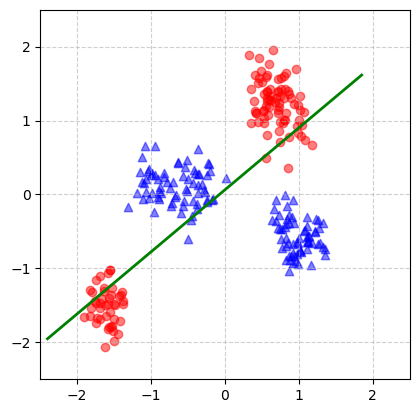

In [189]:
# 시각화
plt.axes().set_aspect('equal')
plt.xlim((-2.5,2.5)) # 적당히 설정, 안해도됨
plt.ylim((-2.5,2.5))

x_min = scaled_df['x'].min() - 0.5
x_max = scaled_df['x'].max() + 0.5
y_min = scaled_df['y'].min() - 0.5
y_max = scaled_df['y'].max() + 0.5
xx = np.linspace(x_min, x_max, 100)

w = svm.coef_[0]
b = svm.intercept_[0]

# 결정 경계 방정식: w[0]*x + w[1]*y + b = 0
# y = (-w[0]/w[1])*x + (-b/w[1])
yy = (-w[0] / w[1]) * xx - (b / w[1])
plt.plot(xx, yy, color='green', linestyle='-', linewidth=2)

# 데이터 출력
plt.scatter(df_a['x'], df_a['y'], color='red', marker='o', alpha=0.5)
plt.scatter(df_b['x'], df_b['y'], color='blue', marker='^', alpha=0.5)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 선형 모델은 이런 형태의 데이터에 적합하지 않다.

# y 특성을 제곱한 y2특성을 추가하여 3차원으로 확장하기

In [193]:
scaled_df.head()

,x,y,z
0,-1.901390,-1.657493,a
1,-1.748694,-1.465842,a
2,-1.574859,-1.789259,a
3,-1.832077,-1.646748,a
4,-1.586647,-1.813074,a


In [199]:
scaled_df_y2 = scaled_df.copy()
scaled_df_y2['y2'] = scaled_df['y'] ** 2
scaled_df_y2.head()

,x,y,z,y2
0,-1.901390,-1.657493,a,2.747284
1,-1.748694,-1.465842,a,2.148692
2,-1.574859,-1.789259,a,3.201446
3,-1.832077,-1.646748,a,2.711778
4,-1.586647,-1.813074,a,3.287238


In [201]:
from mpl_toolkits.mplot3d import Axes3D

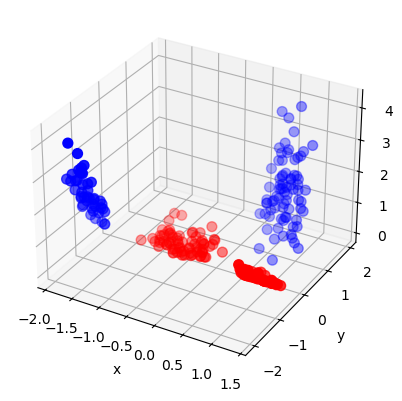

In [263]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


df_a = scaled_df_y2[ scaled_df_y2['z'] == 'a' ]
x_coords = df_a['x'].values
y_coords = df_a['y'].values
z_coords = df_a['y2'].values
scatter_plot = ax.scatter(x_coords, y_coords, z_coords,
                          s=50,
                          color='blue',
                          marker='o')

df_b = scaled_df_y2[ scaled_df_y2['z'] == 'b' ]
x_coords = df_b['x'].values
y_coords = df_b['y'].values
z_coords = df_b['y2'].values
scatter_plot = ax.scatter(x_coords, y_coords, z_coords,
                          s=50,
                          color='red',
                          marker='o')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('y2')
# ax.view_init(elev=20, azim=-30)
plt.show()

# 다항식 커널 사용하기

In [293]:
scaled_df_y2.head()
X = scaled_df_y2.drop('z', axis=1)
y = scaled_df_y2['z']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [279]:
from sklearn.svm import SVC

In [295]:
svm = LinearSVC(max_iter=10000, random_state=1234, dual=False) # n_samples > n_features인 경우 dual=False
svm.fit(X_train, y_train)

LinearSVC(dual=False, max_iter=10000, random_state=1234)

In [297]:
preds = svm.predict(X_test)
preds

array(['b', 'a', 'b', 'a', 'b', 'b', 'b', 'b', 'a', 'b', 'b', 'a', 'b',
       'a', 'b', 'b', 'a', 'a', 'b', 'a', 'b', 'b', 'a', 'b', 'a', 'b',
       'b', 'b', 'b', 'a', 'a', 'b', 'a', 'a', 'a', 'b', 'b', 'b', 'b',
       'a', 'b', 'a', 'b', 'a', 'b', 'b', 'a', 'b', 'a', 'b', 'b', 'b'],
      dtype=object)

In [299]:
print(accuracy_score(y_test, preds))
print(classification_report(y_test, preds, target_names=['a','b']))

1.0
              precision    recall  f1-score   support

           a       1.00      1.00      1.00        20
           b       1.00      1.00      1.00        32

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52



In [301]:
print(svm.coef_)
print(svm.intercept_)

[[ 0.07833811 -0.84581431 -2.07604041]]
[1.385369]
